# 2020 Report: Trends in the usage and purchase intentions of smartphones

In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\Nallely Abigail Cruz\\Desktop\\marketing\\market research\\Quantitative analysis\\module 4')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sidetable
import seaborn as sns

C:\Users\Nallely Abigail Cruz\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing data**
- Importing two versions of the survey: 
    - Survey where each answer is coded with numbers (version 1)
    - Survey_text where answers is in text (version 2)

In [3]:
survey=pd.read_excel("data_1.xlsx")
# Eliminating the row including variable names and first questions
survey=survey.iloc[1:,5:]

In [4]:
# saving names of the variables
variables_names=survey.iloc[0,5:]

In [5]:
survey_text=pd.read_excel("data_1_text_answers.xlsx")
# dropping variables not used for the analysis
survey_text=survey_text.iloc[:,10:]

# Recoding data 

**Age: creating new categories**

Based on the existing age-ranges, we are gonna create new categories: young adults (ages 18-35 years), middle-aged adults (ages 36-55 years), and older adults (aged older than 55 years)

In [6]:
# Classifying respondents in 2017 according to age range: 
years=[[-18,24],[-25,34],[-35,44],[-45,54],[-55,64],[-65,74],[-75,84]]
res = [sum(i) for i in (years)] 
res

[6, 9, 9, 9, 9, 9, 9]

In [7]:
# Recoding in survey-v1
survey["age_categories"]="0"
survey.loc[survey.Q26==1,"age_categories"]="18 <"
survey.loc[(survey.Q26==2)|(survey.Q26==3),"age_categories"]="18-34"
survey.loc[(survey.Q26==4)|(survey.Q26==5),"age_categories"]="35-55"
survey.loc[(survey.Q26==6)|(survey.Q26==7)|(survey.Q26==8)|(survey.Q26==9),"age_categories"]="55 >"

In [8]:
survey.age_categories.value_counts()

18-34    645
35-55    517
55 >      91
18 <      64
Name: age_categories, dtype: int64

In [9]:
# Recoding in survey-v2
survey_text["age_categories"]="0"
survey_text.loc[survey_text.Q26=="Under 18","age_categories"]="18 <"
survey_text.loc[(survey_text.Q26=="18 - 24")|(survey_text.Q26=="25 - 34"),"age_categories"]="18-34"
survey_text.loc[(survey_text.Q26=="35 - 44")|(survey_text.Q26=="45 - 54"),"age_categories"]="35-55"
survey_text.loc[(survey_text.Q26=="55 - 64")|(survey_text.Q26=="65 - 74")|(survey_text.Q26=="75 - 84")|(survey_text.Q26=="85 or older"),"age_categories"]="55 >"

**Education level: regrouping categories**

In [10]:
# Level of education:
survey_text["education"]=survey_text["Q28"]
survey_text.loc[survey_text.Q28=="Master's degree","education"]="Post_graduate"
survey_text.loc[survey_text.Q28=="Doctoral degree","education"]="Post_graduate"

In [11]:
survey_text.education.value_counts()

Post_graduate                            467
Bachelor's degree in college (4-year)    436
Some college but no degree               166
Associate degree in college (2-year)     128
High school graduate                      49
Professional degree (JD, MD)              40
Less than high school degree              31
Name: education, dtype: int64

**Country: creating new labels**

In [12]:
# keeping first 5 countries and classifying the rest as other:
country=survey_text.Q15.value_counts(normalize=True)
country[:5]*100

United States of America    33.181473
India                        9.567198
China                        8.276386
Canada                       5.770691
Mexico                       5.011390
Name: Q15, dtype: float64

In [13]:
survey_text["country"]="Other"
survey_text.loc[survey_text.Q15=="United States of America","country"]="United States of America"
survey_text.loc[survey_text.Q15=="India","country"]="India"
survey_text.loc[survey_text.Q15=="China","country"]="China"
survey_text.loc[survey_text.Q15=="Canada","country"]="Canada"
survey_text.loc[survey_text.Q15=="Mexico","country"]="Mexico"
survey_text["country"].value_counts()

Other                       503
United States of America    437
India                       126
China                       109
Canada                       76
Mexico                       66
Name: country, dtype: int64

# Data visualization

- We are gonna segment respondents according to three age groups: young adults (ages 18-35 years), middle-aged adults (ages 36-55 years), and older adults (aged older than 55 years).
- Perfom visualizations comparing each question by group.

## **DEMOGRAPHICS** :

In [14]:
age_groups=survey_text["age_categories"].value_counts(normalize=True)*100
age_groups_table=round(age_groups,2)
age_groups_table=age_groups_table.reindex(index=["18 <","18-34","35-55","55 >"])

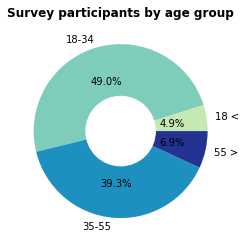

In [15]:
from matplotlib import cm
category_colors = plt.get_cmap('YlGnBu')(np.linspace(0, 1,9))

# Custom colors --> colors will cycle
plt.pie(age_groups_table, labels=["18 <","18-34","35-55","55 >"], colors=[category_colors[2],category_colors[3],category_colors[5],category_colors[7]],autopct='%1.1f%%')
p=plt.gcf()
my_circle=plt.Circle( (0,0), 0.4, color='white')
p.gca().add_artist(my_circle)
plt.title("Survey participants by age group",fontweight="bold")
#plt.show()
path='graphs\\age'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")

**Education and age group**

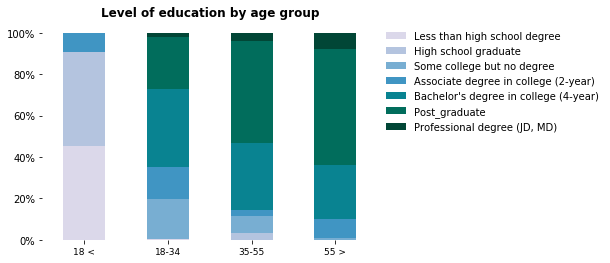

In [16]:
columns_education=['Less than high school degree','High school graduate','Some college but no degree','Associate degree in college (2-year)',"Bachelor's degree in college (4-year)",'Post_graduate','Professional degree (JD, MD)']
age_education=survey_text.groupby("age_categories")["education"].value_counts(normalize=True).unstack(-1)*100
age_educationf=round(age_education,2)

# plotting: 
category_colors = plt.get_cmap('PuBuGn')(np.linspace(0.2, 1,7))

colorlist=[category_colors[0],category_colors[1],
       category_colors[2],category_colors[3],category_colors[4],
      category_colors[5],category_colors[6]]

age_educationf.loc[:,columns_education].iloc[:4,:].plot.bar(stacked=True,color=colorlist)
# Eliminating borders: spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

#titles: 
plt.title("Level of education by age group",fontweight="bold")
plt.xlabel("")

import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

#legend format: 
leg=plt.legend(bbox_to_anchor=(1,1), loc="upper left")
leg.get_frame().set_linewidth(0.0)
plt.xticks(rotation=0,ha="center",fontsize=9)
#plt.show()

path='graphs\\education'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")

**Job experience and age group**

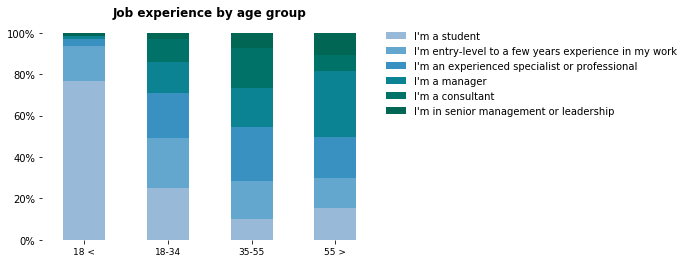

In [17]:
columns_14=["I'm a student","I'm entry-level to a few years experience in my work","I'm an experienced specialist or professional","I'm a manager","I'm a consultant","I'm in senior management or leadership"]
age_experience=survey_text.groupby("age_categories")["Q14"].value_counts(normalize=True).unstack(-1)*100
age_experiencef=round(age_experience,2)

# plotting: 
category_colors = plt.get_cmap('PuBuGn')(np.linspace(0.4, 1,12))

colorlist=[category_colors[0],category_colors[2],
       category_colors[4],category_colors[6],category_colors[8],
      category_colors[9],category_colors[11]]

age_experiencef.loc[:,columns_14].iloc[:4,:].plot.bar(stacked=True,color=colorlist)
# Eliminating borders: spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.title("Job experience by age group",fontweight="bold")
#plt.ylabel("%")
plt.xlabel("")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

#legend format: 
leg=plt.legend(bbox_to_anchor=(1,1), loc="upper left")
leg.get_frame().set_linewidth(0.0)

plt.xticks(rotation=0,ha="center",fontsize=9)
#plt.show()

path='graphs\\job_experience'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")

**Country**: keep the top 5

In [18]:
columns_country=["United States of America","India","China","Canada","Mexico","Others"]
age_country=survey_text.groupby("age_categories")["country"].value_counts(normalize=True).unstack(-1)*100
age_countryf=round(age_country,2)

In [19]:
age_countryf

country,Canada,China,India,Mexico,Other,United States of America
age_categories,,,,,,
18 <,6.25,23.44,4.69,7.81,43.75,14.06
18-34,4.96,7.91,9.77,5.43,44.19,27.75
35-55,6.58,6.96,8.70,4.06,30.95,42.75
55 >,6.59,7.69,16.48,5.49,32.97,30.77


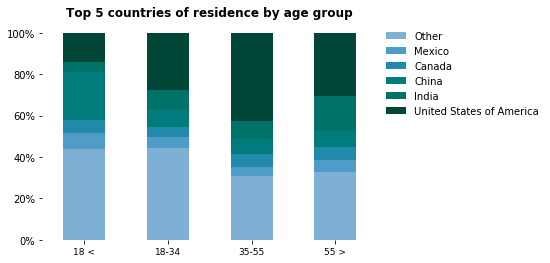

In [20]:
#columns_country=["United States of America","India","China","Canada","Mexico","Other"]
columns_country=["Other","Mexico","Canada","China","India","United States of America"]
age_country=survey_text.groupby("age_categories")["country"].value_counts(normalize=True).unstack(-1)*100
age_countryf=round(age_country,2)

# plotting: 
category_colors = plt.get_cmap('PuBuGn')(np.linspace(0.4, 1,12))

colorlist=[category_colors[1],category_colors[3],
       category_colors[5],category_colors[7],category_colors[8],
      category_colors[11]]

age_countryf.loc[:,columns_country].iloc[:4,:].plot.bar(stacked=True,color=colorlist)
# Eliminating borders: spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.title("Top 5 countries of residence by age group",fontweight="bold")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
plt.xlabel("")

#legend format: 
leg=plt.legend(bbox_to_anchor=(1,1), loc="upper left")
leg.get_frame().set_linewidth(0.0)

plt.xticks(rotation=0,ha="center",fontsize=9)
#plt.show()
path='graphs\\country'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")

##  Smartphone usage questions

**Q17: Do you have a smartphone?**

In [21]:
columns_country=["Yes I have a smartphone","I have a mobile phone, but it is not a smartphone","I do not have any type of mobile phone"]
age_q17=survey_text.groupby("age_categories")["Q17"].value_counts(normalize=True).unstack(-1)*100
age_q17f=round(age_q17,2)

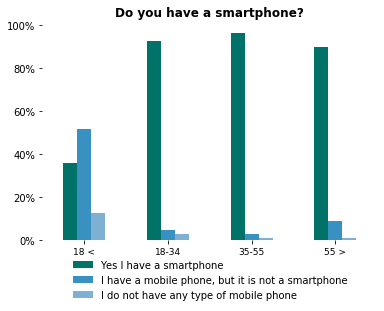

In [22]:
colorlist=[category_colors[8],category_colors[4],
       category_colors[1]]
age_q17f[["Yes I have a smartphone","I have a mobile phone, but it is not a smartphone","I do not have any type of mobile phone"]].plot.bar(color=colorlist)
# Eliminating borders: spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.title("Do you have a smartphone?",fontweight="bold")
plt.xlabel("")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

#legend format: 
leg=plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=False, shadow=False, ncol=1)
leg=leg.get_frame().set_linewidth(0.0)

plt.xticks(rotation=0,ha="center",fontsize=9)
#plt.show()

path='graphs\\q17'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")

**Q10 What best describes your current smartphone?**

In [23]:
columns_q10=['Android','iOS (Apple)','Windows','Other']
age_q10=survey_text.groupby("age_categories")["Q10"].value_counts(normalize=True).unstack(-1)*100
age_q10f=round(age_q10,2)

In [24]:
age_q10f

Q10,Android,Other,Windows,iOS (Apple)
age_categories,,,,
18 <,86.96,4.35,4.35,4.35
18-34,79.17,1.33,1.00,18.50
35-55,71.34,1.20,1.20,26.25
55 >,76.83,1.22,1.22,20.73


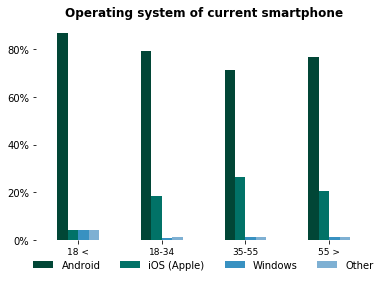

In [25]:
colorlist=[category_colors[11],category_colors[8],
       category_colors[4], category_colors[1]]

age_q10f[['Android','iOS (Apple)','Windows','Other']].plot.bar(color=colorlist)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.title("Operating system of current smartphone",fontweight="bold")
plt.xlabel("")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

#legend format: 
leg=plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=False, shadow=False, ncol=4)
leg=leg.get_frame().set_linewidth(0.0)

#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks(rotation=0,ha="center",fontsize=9)
#plt.show()

path='graphs\\q10'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")

 **Q9: Select only questions for people who declare having a smartphone (Q17="Yes I have a smartphone)** 

In [26]:
survey_q9_columns=['Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7', 'Q9_8',
       'Q9_9', 'Q9_10']
survey_q9=survey_text.loc[survey_text['Q17']=="Yes I have a smartphone",survey_q9_columns]

In [27]:
q9={}
for i in survey_q9_columns:
    q9_sq=survey_q9[i].value_counts(normalize=True).reindex(index=['Almost every hour','A few times a day','A few times a week','A few times a month','Seldom or never'])
    q9[i]=q9_sq

In [28]:
q9_df=pd.concat([q9["Q9_1"],q9["Q9_2"],q9["Q9_3"],q9["Q9_4"],q9["Q9_5"],q9["Q9_6"],q9["Q9_7"],q9["Q9_8"],q9["Q9_9"],q9["Q9_10"]],axis=1)

In [29]:
q9_f=round(q9_df*100,2)

In [30]:
q9_f.rename(columns={"Q9_1":'Phone and/or video calls', "Q9_2":'Texting and messaging', 
                       "Q9_3":'Email and Calendar', "Q9_4":'Getting information', "Q9_5":'Social media',
                       "Q9_6":"Playing games","Q9_7":"Texting and sharing pic and videos","Q9_8":"Mapping and navigating",
                       "Q9_9":"Consuming media","Q9_10":"Tracking health and fitness"},inplace=True)

In [31]:
q9_f=q9_f.transpose()

In [32]:
q9_f

,Almost every hour,A few times a day,A few times a week,A few times a month,Seldom or never
Phone and/or video calls,23.54,36.94,24.63,11.40,3.49
Texting and messaging,44.01,30.03,14.98,7.74,3.24
Email and Calendar,45.09,33.44,11.73,5.99,3.74
Getting information,17.47,41.43,25.62,11.81,3.66
Social media,18.55,22.71,20.63,16.81,21.30
Playing games,3.91,13.98,16.22,21.38,44.51
Texting and sharing pic and videos,15.56,32.20,34.03,14.23,3.99
Mapping and navigating,4.66,19.13,34.94,25.62,15.64
Consuming media,11.81,26.71,25.87,21.13,14.48
Tracking health and fitness,5.32,7.90,7.57,7.99,71.21


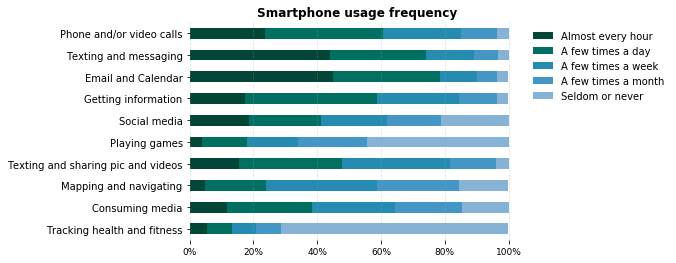

In [33]:
# Modifying colours: choose a cmap ex. 'Spectral'
category_colors = plt.get_cmap('PuBuGn')(np.linspace(0.4, 1,17))

colorlist=[category_colors[16],category_colors[12],\
           category_colors[7],category_colors[5],category_colors[1]]

q9_f.plot.barh(stacked=True,color=colorlist)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.title("Smartphone usage frequency",fontweight="bold")

# Order of questions: if a eliminate this code, the first row (ex. 1 question) will appear at the bottom
plt.gca().invert_yaxis()
# Adding grey vertical lines in the plot
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)

#legend format: 
leg=plt.legend(bbox_to_anchor=(1,1), loc="upper left")
leg.get_frame().set_linewidth(0.0)
plt.xticks(rotation=0,ha="center",fontsize=9)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
#plt.show()

path='graphs\\q9'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")

**Plotting Q9 for sub-age groups**

In [34]:
# define segmentation:
age_groups=["18-34","35-55","55 >"]
dic_ageg={}
for i in age_groups:
    # Filtering by two criteria: q17 and age
    age_groups=survey_text.loc[(survey_text['Q17']=="Yes I have a smartphone") & (survey_text['age_categories']==i),:]
    dic_ageg[i]=age_groups

In [35]:
# 3 data frames for each 
g_18_34=dic_ageg["18-34"]
g_35_55=dic_ageg["35-55"]
g_55=dic_ageg["55 >"]

In [36]:
# defining data q9 for each age_group: 
survey_q9_columns=['Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7', 'Q9_8',
       'Q9_9', 'Q9_10']

survey_q9_18_34=g_18_34.loc[g_18_34['Q17']=="Yes I have a smartphone",survey_q9_columns]
survey_q9_35_55=g_35_55.loc[g_35_55['Q17']=="Yes I have a smartphone",survey_q9_columns]
survey_q9_55=g_55.loc[g_55['Q17']=="Yes I have a smartphone",survey_q9_columns]

In [37]:
# Calculating percentages and answers for each group: 
q9_18_34={}
for i in survey_q9_columns:
    q9_sq=survey_q9_18_34[i].value_counts(normalize=True).reindex(index=['Almost every hour','A few times a day','A few times a week','A few times a month','Seldom or never'])
    q9[i]=q9_sq
    q9_18_34=pd.concat([q9["Q9_1"],q9["Q9_2"],q9["Q9_3"],q9["Q9_4"],q9["Q9_5"],q9["Q9_6"],q9["Q9_7"],q9["Q9_8"],q9["Q9_9"],q9["Q9_10"]],axis=1)

In [38]:
q9_35_55={}
for i in survey_q9_columns:
    q9_sq=survey_q9_35_55[i].value_counts(normalize=True).reindex(index=['Almost every hour','A few times a day','A few times a week','A few times a month','Seldom or never'])
    q9[i]=q9_sq
    q9_35_55=pd.concat([q9["Q9_1"],q9["Q9_2"],q9["Q9_3"],q9["Q9_4"],q9["Q9_5"],q9["Q9_6"],q9["Q9_7"],q9["Q9_8"],q9["Q9_9"],q9["Q9_10"]],axis=1)

In [39]:
q9_55={}
for i in survey_q9_columns:
    q9_sq=survey_q9_55[i].value_counts(normalize=True).reindex(index=['Almost every hour','A few times a day','A few times a week','A few times a month','Seldom or never'])
    q9[i]=q9_sq
    q9_55=pd.concat([q9["Q9_1"],q9["Q9_2"],q9["Q9_3"],q9["Q9_4"],q9["Q9_5"],q9["Q9_6"],q9["Q9_7"],q9["Q9_8"],q9["Q9_9"],q9["Q9_10"]],axis=1)

In [40]:
# Choosing the questions we are gonna plot:
df_q2=pd.concat([q9_18_34["Q9_2"],q9_35_55["Q9_2"],q9_55["Q9_2"]],axis=1)
df_q2.columns = [ '18-34', '35-55', '55 >' ]
df_q2=round(df_q2*100,2).transpose()
df_q2

,Almost every hour,A few times a day,A few times a week,A few times a month,Seldom or never
18-34,47.32,25.42,16.22,7.86,3.18
35-55,39.88,35.27,14.03,7.62,3.21
55 >,42.68,32.93,10.98,8.54,4.88


In [41]:
# Choosing the questions we are gonna plot:
df_q3=pd.concat([q9_18_34["Q9_3"],q9_35_55["Q9_3"],q9_55["Q9_3"]],axis=1)
df_q3.columns = [ '18-34', '35-55', '55 >' ]
df_q3=round(df_q3*100,2).transpose()
df_q3

,Almost every hour,A few times a day,A few times a week,A few times a month,Seldom or never
18-34,47.49,30.94,11.54,6.69,3.34
35-55,43.29,37.07,11.22,4.21,4.21
55 >,36.59,32.93,13.41,12.20,4.88


In [42]:
# Choosing the questions we are gonna plot:
df_q5=pd.concat([q9_18_34["Q9_5"],q9_35_55["Q9_5"],q9_55["Q9_5"]],axis=1)
df_q5.columns = [ '18-34', '35-55', '55 >' ]
df_q5=round(df_q5*100,2).transpose()
df_q5

,Almost every hour,A few times a day,A few times a week,A few times a month,Seldom or never
18-34,18.90,22.24,19.40,20.57,18.90
35-55,18.04,24.05,22.24,14.23,21.44
55 >,20.73,17.07,21.95,6.10,34.15


In [43]:
# Choosing the questions we are gonna plot:
df_q6=pd.concat([q9_18_34["Q9_6"],q9_35_55["Q9_6"],q9_55["Q9_6"]],axis=1)
df_q6.columns = [ '18-34', '35-55', '55 >' ]
df_q6=round(df_q6*100,2).transpose()
df_q6

,Almost every hour,A few times a day,A few times a week,A few times a month,Seldom or never
18-34,4.35,16.22,18.39,23.41,37.63
35-55,2.61,11.42,13.23,18.24,54.51
55 >,6.10,13.41,13.41,28.05,39.02


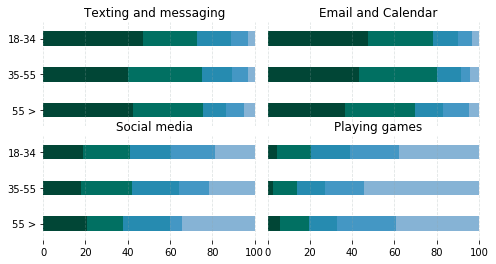

In [44]:
category_colors = plt.get_cmap('PuBuGn')(np.linspace(0.4, 1,17))

colorlist=[category_colors[16],category_colors[12],\
           category_colors[7],category_colors[5],category_colors[1]]


fig, axarr = plt.subplots(2, 2, figsize=(8, 4),sharex=False,sharey=False)
#fig.suptitle('How often you use your smartphone for it?',fontweight="bold")

df_q2.plot.barh(stacked=True,width=0.4,color=colorlist,ax=axarr[0][0])
axarr[0][0].set(frame_on=False)
axarr[0][0].invert_yaxis()
axarr[0][0].get_legend().remove()
axarr[0][0].title.set_text("Texting and messaging")
axarr[0][0].grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)
axarr[0][0].xaxis.set_ticklabels([])
axarr[0][0].xaxis.set_ticks_position('none')

df_q3.plot.barh(stacked=True,width=0.4,color=colorlist,ax=axarr[0][1])
axarr[0][1].set(frame_on=False) 
axarr[0][1].invert_yaxis()
axarr[0][1].get_legend().remove()
axarr[0][1].title.set_text("Email and Calendar")
axarr[0][1].grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)
axarr[0][1].xaxis.set_ticklabels([])
axarr[0][1].yaxis.set_ticklabels([])
axarr[0][1].xaxis.set_ticks_position('none')
axarr[0][1].yaxis.set_ticks_position('none')

df_q5.plot.barh(stacked=True,width=0.4,color=colorlist,ax=axarr[1][0])
axarr[1][0].set(frame_on=False) 
axarr[1][0].invert_yaxis()
axarr[1][0].get_legend().remove()
axarr[1][0].title.set_text("Social media")
axarr[1][0].grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)

df_q6.plot.barh(stacked=True,width=0.4,color=colorlist,ax=axarr[1][1])
axarr[1][1].set(frame_on=False) 
axarr[1][1].invert_yaxis()
axarr[1][1].get_legend().remove()
axarr[1][1].title.set_text("Playing games")
axarr[1][1].yaxis.set_ticks([])
axarr[1][1].grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)

plt.subplots_adjust(wspace=0.01, hspace=0.09)
#plt.show()


path='graphs\\q9_'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")

**Q17: star ratings to all the smartphone activities below** 

In [45]:
q17=survey_text.iloc[:, np.r_[5,20:32]].loc[survey_text['Q17']=="Yes I have a smartphone",:].iloc[:,1:11]
# Calculate and keep only the mean
q17_df=q17.describe().iloc[1,:].round(2)

In [46]:
q17_df

Q17_1     3.73
Q17_2     3.97
Q17_3     3.98
Q17_4     3.48
Q17_5     2.96
Q17_6     2.33
Q17_7     3.50
Q17_8     2.89
Q17_9     2.98
Q17_10    2.26
Name: mean, dtype: float64

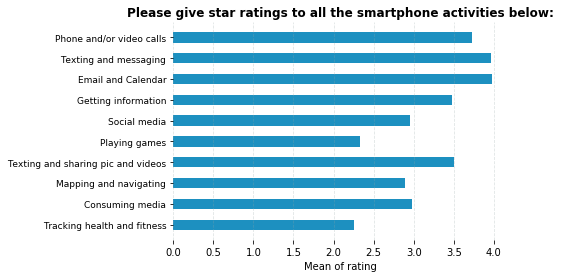

In [47]:
df=q17_df
# Array of the values you want to plot
dataVar1 = df.values
# XMain: array with the names for each question 
xMain = df.index

category_colors = plt.get_cmap('YlGnBu')(np.linspace(0, 1,9))

# Choose width of bars: width
height=0.5

# Plot data for each array: 
p1 = plt.barh(xMain, 
            dataVar1, 
            height=height,
            color=category_colors[5])
# Adding names to each bar: 
plt.yticks(xMain,('Phone and/or video calls', 'Texting and messaging', 'Email and Calendar', 'Getting information', 'Social media',"Playing games","Texting and sharing pic and videos","Mapping and navigating","Consuming media","Tracking health and fitness"),rotation=0,ha="right",fontsize=9)

# Order of questions: if a eliminate this code, the first row (ex. 1 question) will appear at the bottom
plt.gca().invert_yaxis()

# Eliminating borders: spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adding grey vertical lines in the plot
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)

#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title("Please give star ratings to all the smartphone activities below:",fontweight="bold")
plt.xlabel("Mean of rating")
#plt.show()

# show the graph
#plt.savefig('output_fig.png')
path='graphs\\17_ratings'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")

In [48]:
age_groups=["18-34","35-55","55 >"]
survey_q17_columns=['Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8','Q17_9', 'Q17_10']

dic_q17={}
for i in age_groups: 
    q17_age=survey_text.loc[(survey_text['Q17']=="Yes I have a smartphone") & (survey_text['age_categories']==i),survey_q17_columns]
    q17_age_mean=q17_age.describe().iloc[1,:].round(2)
    dic_q17[i]=q17_age_mean

In [49]:
dic_q17["18-34"]

Q17_1     3.61
Q17_2     3.90
Q17_3     3.91
Q17_4     3.39
Q17_5     2.97
Q17_6     2.49
Q17_7     3.51
Q17_8     2.75
Q17_9     3.03
Q17_10    2.30
Name: mean, dtype: float64

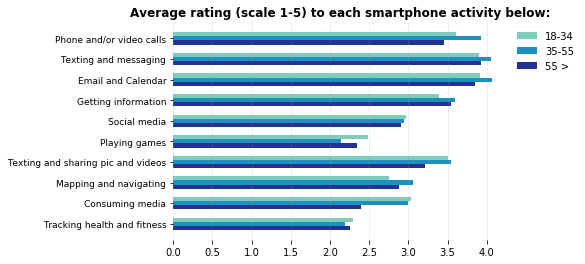

In [51]:
# Array of the values you want to plot for each group
df1=dic_q17["18-34"]
dataVar1 = df1.values

df2=dic_q17["35-55"]
dataVar2 = df2.values

df3=dic_q17["55 >"]
dataVar3 = df3.values


# XMain: array with length of the number of bars. EX. 9 subquestions, 9 x ticks.
xMain = np.arange(len(df1.index)) 

category_colors = plt.get_cmap('YlGnBu')(np.linspace(0, 1,9))
# Choose width of bars: width
height=0.20

# Plot data for each array: 
p1 = plt.barh((xMain - 0.20), 
            dataVar1,
            height=height,
            color=[category_colors[3]],label="18-34")
p2 = plt.barh(xMain, 
            dataVar2, 
            height=height, 
            color=[category_colors[5]],label="35-55")
p3 = plt.barh((xMain + 0.20), 
            dataVar3, 
            height=height, 
            color=[category_colors[7]],label="55 >")


# Adding names to each bar: 
plt.yticks(xMain,('Phone and/or video calls', 'Texting and messaging', 
                  'Email and Calendar', 'Getting information', 'Social media',
                  "Playing games","Texting and sharing pic and videos","Mapping and navigating",
                  "Consuming media","Tracking health and fitness"),rotation=0,ha="right",fontsize=9)

# Order of questions: if a eliminate this code, the first row (ex. 1 question) will appear at the bottom
plt.gca().invert_yaxis()

# Eliminating borders: spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adding grey vertical lines in the plot
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)

leg=plt.legend(bbox_to_anchor=(1,1), loc="upper left")
leg.get_frame().set_linewidth(0.0)

plt.title("Average rating (scale 1-5) to each smartphone activity below:",fontweight="bold")
#plt.show()

# show the graph
#plt.savefig('output_fig.png')
path='graphs\\q17_ratings_age'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")

## Questions related to intentions and preferences when buying a smartphone

**Q34 Which of the following impacts your decision to upgrade to a new phone? (Please select all that apply)** multiple answer

In [52]:
q34=survey.iloc[:, np.r_[7,35:42]].loc[survey['Q17']==1,:].iloc[:,1:]

In [53]:
q34

,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_6_TEXT
1,1,NaN,NaN,1,1,NaN,NaN
2,NaN,NaN,NaN,NaN,1,1,Just plain time for an upgrade
3,NaN,NaN,NaN,NaN,1,NaN,NaN
4,NaN,NaN,NaN,1,1,NaN,NaN
5,NaN,NaN,NaN,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...
1313,NaN,1,NaN,NaN,1,NaN,NaN
1314,NaN,NaN,NaN,1,1,NaN,NaN
1315,1,NaN,NaN,NaN,NaN,NaN,NaN
1316,NaN,NaN,NaN,NaN,1,NaN,NaN


In [54]:
# replacing the variable containing text by 1:
q34["Q34_6_TEXT"].fillna(0,inplace=True)
q34["Q34_other"]=1
q34.loc[q34["Q34_6_TEXT"]==0,"Q34_other"]=0

In [55]:
# Multiple questions: divide number of respondents and multiply 100
q34=round(q34.sum()/1201,2)

In [56]:
q34f=q34*100

In [57]:
q34f.drop(index=["Q34_6"],inplace=True)

In [58]:
q34f

Q34_1        52.0
Q34_2        18.0
Q34_3        16.0
Q34_4        25.0
Q34_5        52.0
Q34_other     4.0
dtype: float64

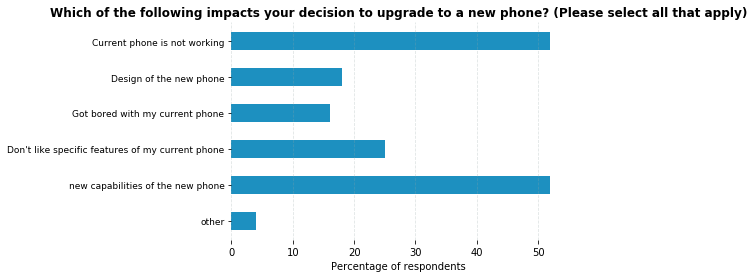

In [59]:
df=q34f
# Array of the values you want to plot
dataVar1 = df.values
# XMain: array with the names for each question 
xMain = df.index

category_colors = plt.get_cmap('YlGnBu')(np.linspace(0, 1,9))

# Choose width of bars: width
height=0.5

# Plot data for each array: 
p1 = plt.barh(xMain, 
            dataVar1, 
            height=height,
            color=category_colors[5])
# Adding names to each bar: 
plt.yticks(xMain,('Current phone is not working', 'Design of the new phone', 'Got bored with my current phone', "Don't like specific features of my current phone", 'new capabilities of the new phone',"other"),rotation=0,ha="right",fontsize=9)

# Order of questions: if a eliminate this code, the first row (ex. 1 question) will appear at the bottom
plt.gca().invert_yaxis()

# Eliminating borders: spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adding grey vertical lines in the plot
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)

#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title("Which of the following impacts your decision to upgrade to a new phone? (Please select all that apply)",fontweight="bold")
plt.xlabel("Percentage of respondents")
#plt.show()

# show the graph
#plt.savefig('output_fig.png')
path='graphs\\q34'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")


In [60]:
survey.loc[(survey['Q17']==1),"age_categories"].value_counts()

18-34    598
35-55    499
55 >      82
18 <      23
Name: age_categories, dtype: int64

In [61]:
age_groups=["18-34","35-55","55 >"]
survey_q34_columns=['Q34_1', 'Q34_2', 'Q34_3', 'Q34_4', 'Q34_5', 'Q34_6', 'Q34_6_TEXT']

dic_q34={}
for i in age_groups: 
    q34_age=survey.loc[(survey['Q17']==1) & (survey['age_categories']==i),survey_q34_columns]
    # replacing the variable containing text by 1:
    q34_age["Q34_6_TEXT"].fillna(0,inplace=True)
    q34_age["Q34_other"]=1
    q34_age.loc[q34_age["Q34_6_TEXT"]==0,"Q34_other"]=0
    q34_age=q34_age.sum()
    q34_age.drop(index=["Q34_6"],inplace=True)
    dic_q34[i]=q34_age

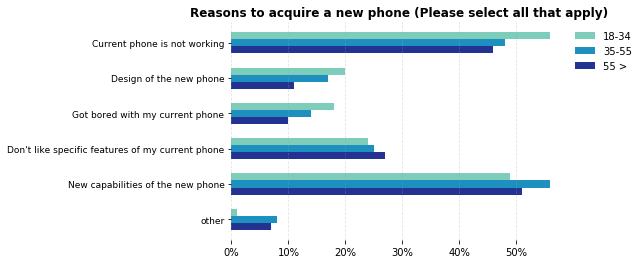

In [62]:
# Array of the values you want to plot for each group
df1=round(dic_q34["18-34"]/598,2)*100
dataVar1 = df1.values

df2=round(dic_q34["35-55"]/499,2)*100
dataVar2 = df2.values

df3=round(dic_q34["55 >"]/82,2)*100
dataVar3 = df3.values

# XMain: array with length of the number of bars. EX. 9 subquestions, 9 x ticks.
xMain = np.arange(len(df1.index)) 

category_colors = plt.get_cmap('YlGnBu')(np.linspace(0, 1,9))

# Choose width of bars: width
height=0.20

# Plot data for each array: 
p1 = plt.barh((xMain - 0.20), 
            dataVar1,
            height=height,
            color=[category_colors[3]],label="18-34")
p2 = plt.barh(xMain, 
            dataVar2, 
            height=height, 
            color=[category_colors[5]],label="35-55")
p3 = plt.barh((xMain + 0.20), 
            dataVar3, 
            height=height, 
            color=[category_colors[7]],label="55 >")


# Adding names to each bar: 
plt.yticks(xMain,('Current phone is not working', 'Design of the new phone', 
                'Got bored with my current phone', "Don't like specific features of my current phone", 
                'New capabilities of the new phone',"other"),rotation=0,ha="right",fontsize=9)
# Order of questions: if a eliminate this code, the first row (ex. 1 question) will appear at the bottom
plt.gca().invert_yaxis()

# Eliminating borders: spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adding grey vertical lines in the plot
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)

#legend format: 
leg=plt.legend(bbox_to_anchor=(1,1), loc="upper left")
leg.get_frame().set_linewidth(0.0)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

plt.title("Reasons to acquire a new phone (Please select all that apply)",fontweight="bold")

path='graphs\\q34_age'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")


#plt.show()

# show the graph
plt.savefig('output_fig.png')

**Q33 How influential are the following in helping you choose a new phone?**
- Universe is all the respondents, even if they have or not a smartphone

In [63]:
survey_q33_columns=['Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8']
survey_q33=survey_text.loc[:,survey_q33_columns]

In [64]:
q33_dic={}
for i in survey_q33_columns:
    q33_sq=survey_q33[i].value_counts(normalize=True).reindex(index=['Not influential','Somewhat influential','Very influential'])
    q33_dic[i]=q33_sq

In [65]:
q33_df=pd.concat([q33_dic["Q33_1"],q33_dic["Q33_2"],q33_dic["Q33_3"],q33_dic["Q33_4"],q33_dic["Q33_5"],q33_dic["Q33_6"],q33_dic["Q33_7"],q33_dic["Q33_8"]],axis=1)

In [66]:
q33_f=round(q33_df*100,2)

In [67]:
q33_f.rename(columns={"Q33_1":'Friends and/ or colleagues', "Q33_2":'Family', 
                       "Q33_3":'Experts(reviews)', "Q33_4":'Buyers (reviews)', "Q33_5":'Advertising',
                       "Q33_6":"Price","Q33_7":"Store","Q33_8":"Brand"},inplace=True)

In [68]:
q33_f=q33_f.transpose()
q33_f

,Not influential,Somewhat influential,Very influential
Friends and/ or colleagues,21.93,49.26,28.82
Family,37.12,49.80,13.08
Experts(reviews),56.85,30.38,12.76
Buyers (reviews),38.82,46.61,14.58
Advertising,56.30,30.54,13.16
Price,11.15,28.76,60.09
Store,36.10,50.67,13.23
Brand,23.18,41.74,35.08


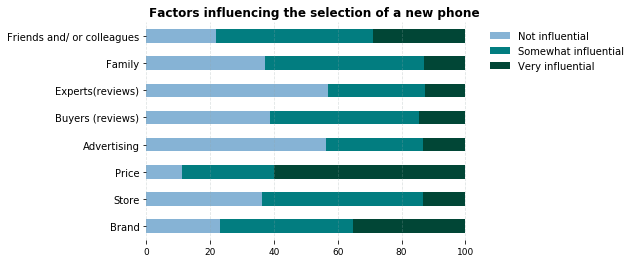

In [405]:
category_colors = plt.get_cmap('PuBuGn')(np.linspace(0.4, 1,17))

colorlist=[category_colors[1],category_colors[10],category_colors[16]]


q33_f.plot.barh(stacked=True,color=colorlist)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.title("Factors influencing the selection of a new phone",fontweight="bold")

# Order of questions: if a eliminate this code, the first row (ex. 1 question) will appear at the bottom
plt.gca().invert_yaxis()
# Adding grey vertical lines in the plot
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)

#legend format: 
leg=plt.legend(bbox_to_anchor=(1,1), loc="upper left")
leg.get_frame().set_linewidth(0.0)

plt.xticks(rotation=0,ha="center",fontsize=9)
#plt.show()

path='graphs\\q33'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")


In [69]:
# defining data q33 for each age_group: 
survey_q33_columns=['Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8']

survey_q33_18_34=g_18_34.loc[:,survey_q33_columns]
survey_q33_35_55=g_35_55.loc[:,survey_q33_columns]
survey_q33_55=g_55.loc[:,survey_q33_columns]

In [70]:
# Calculating percentages and answers for each group: 
q33_18_34={}
for i in survey_q33_columns:
    q33_sq=survey_q33_18_34[i].value_counts(normalize=True).reindex(index=['Not influential','Somewhat influential','Very influential'])
    q33_18_34[i]=q33_sq
q33_18_34=pd.concat([q33_18_34["Q33_1"],q33_18_34["Q33_2"],q33_18_34["Q33_3"],q33_18_34["Q33_4"],q33_18_34["Q33_5"],q33_18_34["Q33_6"],q33_18_34["Q33_7"],q33_18_34["Q33_8"]],axis=1)

In [71]:
q33_35_55={}
for i in survey_q33_columns:
    q33_sq=survey_q33_35_55[i].value_counts(normalize=True).reindex(index=['Not influential','Somewhat influential','Very influential'])
    q33_35_55[i]=q33_sq
q33_35_55=pd.concat([q33_35_55["Q33_1"],q33_35_55["Q33_2"],q33_35_55["Q33_3"],q33_35_55["Q33_4"],q33_35_55["Q33_5"],q33_35_55["Q33_6"],q33_35_55["Q33_7"],q33_35_55["Q33_8"]],axis=1)

In [72]:
q33_55={}
for i in survey_q33_columns:
    q33_sq=survey_q33_55[i].value_counts(normalize=True).reindex(index=['Not influential','Somewhat influential','Very influential'])
    q33_55[i]=q33_sq
q33_55=pd.concat([q33_55["Q33_1"],q33_55["Q33_2"],q33_55["Q33_3"],q33_55["Q33_4"],q33_55["Q33_5"],q33_55["Q33_6"],q33_55["Q33_7"],q33_55["Q33_8"]],axis=1)

In [74]:
# Choosing the questions we are gonna plot:
df_q1=pd.concat([q33_18_34["Q33_1"],q33_35_55["Q33_1"],q33_55["Q33_1"]],axis=1)
df_q1.columns = [ '18-34', '35-55', '55 >' ]
df_q1=round(df_q1*100,2).transpose()
df_q1

,Not influential,Somewhat influential,Very influential
18-34,22.64,51.01,26.35
35-55,22.04,52.60,25.36
55 >,19.51,51.22,29.27


In [75]:
# Choosing the questions we are gonna plot:
df_q5=pd.concat([q33_18_34["Q33_5"],q33_35_55["Q33_5"],q33_55["Q33_5"]],axis=1)
df_q5.columns = [ '18-34', '35-55', '55 >' ]
df_q5=round(df_q5*100,2).transpose()
df_q5

,Not influential,Somewhat influential,Very influential
18-34,58.45,30.07,11.49
35-55,58.21,33.68,8.11
55 >,65.85,30.49,3.66


In [76]:
# Choosing the questions we are gonna plot:
df_q6=pd.concat([q33_18_34["Q33_6"],q33_35_55["Q33_6"],q33_55["Q33_6"]],axis=1)
df_q6.columns = [ '18-34', '35-55', '55 >' ]
df_q6=round(df_q6*100,2).transpose()
df_q6

,Not influential,Somewhat influential,Very influential
18-34,9.46,27.03,63.51
35-55,12.53,34.50,52.98
55 >,12.20,23.17,64.63


In [77]:
# Choosing the questions we are gonna plot:
df_q8=pd.concat([q33_18_34["Q33_8"],q33_35_55["Q33_8"],q33_55["Q33_8"]],axis=1)
df_q8.columns = [ '18-34', '35-55', '55 >' ]
df_q8=round(df_q8*100,2).transpose()
df_q8

,Not influential,Somewhat influential,Very influential
18-34,26.01,42.23,31.76
35-55,18.92,48.02,33.06
55 >,28.05,36.59,35.37


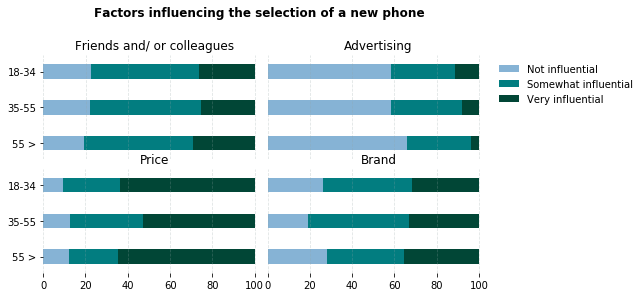

In [78]:
category_colors = plt.get_cmap('PuBuGn')(np.linspace(0.4, 1,17))

colorlist=[category_colors[1],category_colors[10],category_colors[16]]


fig, axarr = plt.subplots(2, 2, figsize=(8, 4),sharex=False,sharey=False)
fig.suptitle('Factors influencing the selection of a new phone',fontweight="bold",y=1.05)

df_q1.plot.barh(stacked=True,width=0.4,color=colorlist,ax=axarr[0][0])
axarr[0][0].set(frame_on=False)
axarr[0][0].invert_yaxis()
axarr[0][0].get_legend().remove()
axarr[0][0].title.set_text('Friends and/ or colleagues')
axarr[0][0].grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)
axarr[0][0].xaxis.set_ticklabels([])
axarr[0][0].xaxis.set_ticks_position('none')

df_q5.plot.barh(stacked=True,width=0.4,color=colorlist,ax=axarr[0][1])
axarr[0][1].set(frame_on=False) 
axarr[0][1].invert_yaxis()
axarr[0][1].get_legend().remove()
axarr[0][1].title.set_text("Advertising")
axarr[0][1].grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)
axarr[0][1].xaxis.set_ticklabels([])
axarr[0][1].yaxis.set_ticklabels([])
axarr[0][1].xaxis.set_ticks_position('none')
axarr[0][1].yaxis.set_ticks_position('none')
leg=axarr[0][1].legend(bbox_to_anchor=(1,1), loc="upper left")
leg.get_frame().set_linewidth(0.0)

df_q6.plot.barh(stacked=True,width=0.4,color=colorlist,ax=axarr[1][0])
axarr[1][0].set(frame_on=False) 
axarr[1][0].invert_yaxis()
axarr[1][0].get_legend().remove()
axarr[1][0].title.set_text("Price")
axarr[1][0].grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)

df_q8.plot.barh(stacked=True,width=0.4,color=colorlist,ax=axarr[1][1])
axarr[1][1].set(frame_on=False) 
axarr[1][1].invert_yaxis()
axarr[1][1].get_legend().remove()
axarr[1][1].title.set_text("Brand")
axarr[1][1].yaxis.set_ticks([])
axarr[1][1].grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)

plt.subplots_adjust(wspace=0.01, hspace=0.09)
#plt.show()

path='graphs\\q33_age'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")

**Q20 The below phones cost more than 90% of the phones in the market. Which would you be most willing to buy?**

In [79]:
q20=survey.loc[:,"Q20"].value_counts(normalize=True)*100

In [80]:
q20=round(q20,2)

In [81]:
q20=q20.reset_index()

In [82]:
q20["index_numeric"]=["4","3","1","2","5"]
q20

,index,Q20,index_numeric
0,4,34.29,4
1,3,21.67,3
2,1,20.19,1
3,2,14.34,2
4,5,9.51,5


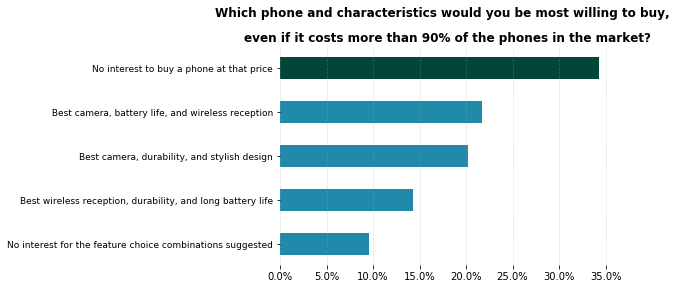

In [83]:
df=q20
# Array of the values you want to plot
dataVar1 = df["Q20"]
# XMain: array with the names for each question 
xMain = df["index_numeric"]

category_colors = plt.get_cmap('PuBuGn')(np.linspace(0.4, 1,12))

# Choose width of bars: width
height=0.5

# Plot data for each array: 
p1 = plt.barh(xMain, 
            dataVar1,
            height=height,
            color=[category_colors[11],category_colors[5],category_colors[5],category_colors[5],category_colors[5]])

# Adding names to each bar: 
labels=("No interest to buy a phone at that price"," Best camera, battery life, and wireless reception","Best camera, durability, and stylish design","Best wireless reception, durability, and long battery life","No interest for the feature choice combinations suggested")
plt.yticks(xMain,(labels),rotation=0,ha="right",fontsize=9)

# Order of questions: if a eliminate this code, the first row (ex. 1 question) will appear at the bottom
plt.gca().invert_yaxis()

# Eliminating borders: spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adding grey vertical lines in the plot
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)

#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.suptitle('Which phone and characteristics would you be most willing to buy,',fontweight="bold",y=1.02)
plt.title("even if it costs more than 90% of the phones in the market?",fontweight="bold" )


plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
#plt.show()

# show the graph
#plt.savefig('output_fig.png')

path='graphs\\q20'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")


**Q11 Which of the below attributes are most important to you in buying a new phone? Please select your top four (4) choices from the options below.**

In [84]:
q11_survey=survey.iloc[:,54:64].sum().sort_values(ascending=False)

In [85]:
q11_survey.index

Index(['Q11_1', 'Q11_5', 'Q11_14', 'Q11_8', 'Q11_3', 'Q11_9', 'Q11_11',
       'Q11_2', 'Q11_13', 'Q11_12'],
      dtype='object')

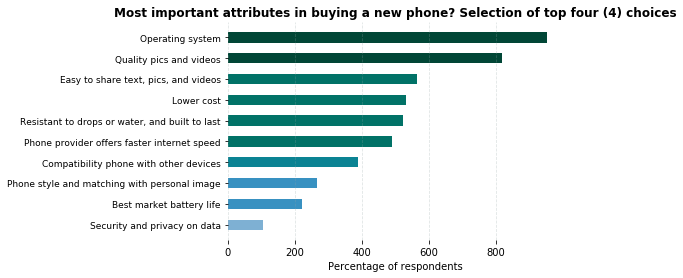

In [86]:
df=q11_survey
# Array of the values you want to plot
dataVar1 = df.values
# XMain: array with the names for each question 
xMain = df.index

category_colors = plt.get_cmap('PuBuGn')(np.linspace(0.4, 1,12))

# Choose width of bars: width
height=0.5

colorlist=[category_colors[11],category_colors[11],\
           category_colors[8],category_colors[8],category_colors[8],category_colors[8],\
           category_colors[6],\
           category_colors[4],category_colors[4],\
           category_colors[1]]

# Plot data for each array: 
p1 = plt.barh(xMain, 
            dataVar1,
            height=height,
            color=colorlist)

# Adding names to each bar: 
labels=("Operating system","Quality pics and videos","Easy to share text, pics, and videos","Lower cost","Resistant to drops or water, and built to last","Phone provider offers faster internet speed","Compatibility phone with other devices","Phone style and matching with personal image","Best market battery life","Security and privacy on data")
plt.yticks(xMain,(labels),rotation=0,ha="right",fontsize=9)

# Order of questions: if a eliminate this code, the first row (ex. 1 question) will appear at the bottom
plt.gca().invert_yaxis()

# Eliminating borders: spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adding grey vertical lines in the plot
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)

#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title("Most important attributes in buying a new phone? Selection of top four (4) choices",fontweight="bold")
plt.xlabel("Percentage of respondents")
#plt.show()

# show the graph
#plt.savefig('output_fig.png')
path='graphs\\q11'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")


In [87]:
age_groups=["18-34","35-55","55 >"]
survey_q11_columns=['Q11_1', 'Q11_5', 'Q11_14', 'Q11_8', 'Q11_3', 'Q11_9', 'Q11_11','Q11_2', 'Q11_13', 'Q11_12']

dic_q11={}
for i in age_groups: 
    q11_age=survey.loc[(survey['age_categories']==i),survey_q11_columns]
    q11_age=q11_age.sum()
    dic_q11[i]=q11_age

In [88]:
q11_18_34=dic_q11["18-34"]
q11_35_55=dic_q11["35-55"]
q11_55=dic_q11["55 >"]

In [89]:
q11_35_55.index

Index(['Q11_1', 'Q11_5', 'Q11_14', 'Q11_8', 'Q11_3', 'Q11_9', 'Q11_11',
       'Q11_2', 'Q11_13', 'Q11_12'],
      dtype='object')

In [90]:
range(len(q11_18_34))

range(0, 10)

In [91]:
np.arange(len(q11_18_34))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

18-34    598
35-55    499
55+       82
18-       23

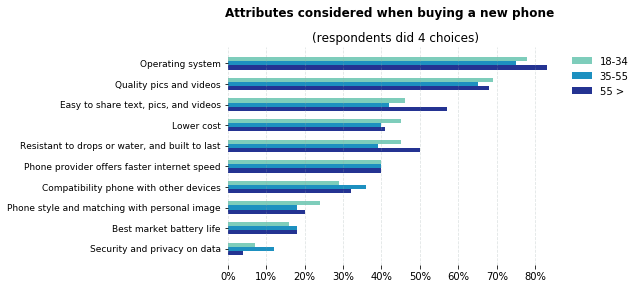

In [92]:
# Array of the values you want to plot
Var1 = q11_18_34.values
dataVar1 = np.round(Var1/598,2)*100
Var2= q11_35_55.values
dataVar2 = np.round(Var2/499,2)*100
Var3 = q11_55.values
dataVar3 = np.round(Var3/82,2)*100

# XMain: array with the names for each question 
xMain =  np.arange(len(q11_18_34))

category_colors = plt.get_cmap('YlGnBu')(np.linspace(0, 1,9))

# Choose width of bars: width
height=0.20

# Plot data for each array: 
p1 = plt.barh((xMain - 0.20), 
            dataVar1,
            height=height,
            color=category_colors[3],label="18-34")
p2 = plt.barh(xMain, 
            dataVar2, 
            height=height, 
            color=category_colors[5],label="35-55")
p3 = plt.barh((xMain + 0.20), 
            dataVar3, 
            height=height, 
            color=category_colors[7],label="55 >")

# Adding names to each bar: 
#labels=("Operating system","Quality pics and videos","Easy to share text, pics, and videos","Lower cost","Resistant to drops or water, and built to last","Phone provider offers faster internet speed","Compatibility phone with other devices","Phone style and matching with personal image","Best market battery life","Security and privacy on data")
plt.yticks(xMain,(labels),rotation=0,ha="right",fontsize=9)

# Order of questions: if a eliminate this code, the first row (ex. 1 question) will appear at the bottom
plt.gca().invert_yaxis()

# Eliminating borders: spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adding grey vertical lines in the plot
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)

#legend format: 
leg=plt.legend(bbox_to_anchor=(1,1), loc="upper left")
leg.get_frame().set_linewidth(0.0)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

plt.suptitle('Attributes considered when buying a new phone',fontweight="bold",y=1.02)
plt.title("(respondents did 4 choices)")
#plt.show()

# show the graph
#plt.savefig('output_fig.png')

#plt.savefig('output_fig.png')
path='graphs\\q11_age'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")

**Q23: Say the 4 attributes you just selected exist in a phone. In fact, this phone is the best in all the attributes. How much would you be willing to pay to purchase this phone? Please**

In [93]:
# identifying respondents that disn't answer in usd
survey.iloc[:,64:].describe(include="all")

,Q23_1,Q23_2,Q23_3,Q23_4,Q23_5,Q23_6,Q23_7,Q23_8,Q23_9,Q23_9_TEXT,Q23_10,Q23_10_TEXT,age_categories
count,1271,6,0,0,0,6,0,0,0,0,1283,1283,1317
unique,1,1,0,0,0,1,0,0,0,0,1,18,4
top,1,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,200,18-34
freq,1271,6,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,1283,138,645


Converting different currencies to USD dollars

In [94]:
# canadian dollars
survey["Q23_2"]=survey["Q23_2"].fillna(value=0).astype(int)

In [95]:
# amount money to numeric
survey["Q23_10_TEXT"]=survey["Q23_10_TEXT"].fillna(value=0).astype(int)

In [96]:
# variable of money in usd
survey["q23_usd"]=survey["Q23_10_TEXT"]

In [97]:
survey.loc[survey["Q23_2"]!=0,"q23_usd"]=0.74*survey["Q23_10_TEXT"]

In [98]:
# chinese Yuan
survey["Q23_6"]=survey["Q23_6"].fillna(value=0).astype(int)
survey.loc[survey["Q23_6"]!=0,"q23_usd"]=0.14*survey["Q23_10_TEXT"]

In [99]:
q_23=survey["q23_usd"].describe()

In [100]:
age_q23=survey.loc[survey["age_categories"]!="18 <",["age_categories","q23_usd"]]

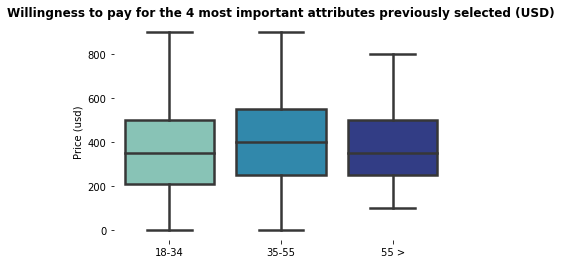

In [101]:
category_colors = plt.get_cmap('YlGnBu')(np.linspace(0, 1,9))
colorlist=[category_colors[3],category_colors[5],category_colors[7]]

sns.boxplot(x="age_categories", y="q23_usd", data=age_q23,linewidth=2.5,order=["18-34", "35-55","55 >"],palette=colorlist)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title("Willingness to pay for the 4 most important attributes previously selected (USD)",fontweight="bold")

plt.ylabel('Price (usd)')
plt.xlabel('')

#plt.show()
#plt.savefig('output_fig.png')
path='graphs\\q23'
# show the graph
plt.savefig(path+'.png',bbox_inches="tight")

In [102]:
survey["q23_usd"].describe()

count    1317.000000
mean      393.948368
std       200.552558
min         0.000000
25%       250.000000
50%       370.000000
75%       550.000000
max       900.000000
Name: q23_usd, dtype: float64

In [103]:
survey.groupby("age_categories")["q23_usd"].describe()

,count,mean,std,min,25%,50%,75%,max
age_categories,,,,,,,,
18 <,64.0,347.656250,202.842829,0.0,237.5,300.0,450.0,850.0
18-34,645.0,378.263566,190.668386,0.0,210.0,350.0,500.0,900.0
35-55,517.0,420.889749,215.168001,0.0,250.0,400.0,550.0,900.0
55 >,91.0,384.615385,161.879981,100.0,250.0,350.0,500.0,800.0


In [104]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y


In [105]:
# 3 data frames for each 
g_18_34_q23=survey.loc[survey["age_categories"]=="18-34","q23_usd"]
g_35_55_q23=survey.loc[survey["age_categories"]=="35-55","q23_usd"]
g_55_q23=survey.loc[survey["age_categories"]=="55 >","q23_usd"]

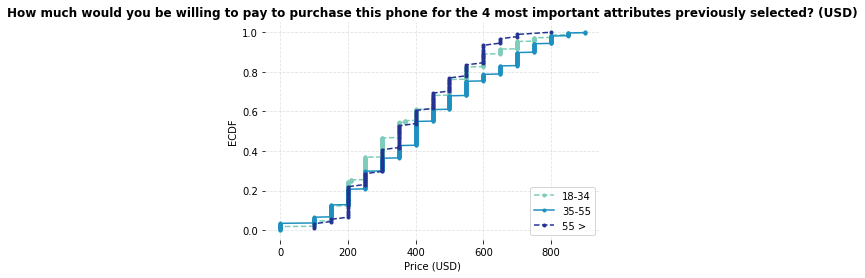

In [106]:
category_colors = plt.get_cmap('YlGnBu')(np.linspace(0, 1,9))
colorlist=[category_colors[3],category_colors[5],category_colors[7]]



# Compute ECDFs
x_18_34,y_18_34=ecdf(g_18_34_q23)
x_35_55,y_35_55 = ecdf(g_35_55_q23)
x_55,y_55= ecdf(g_55_q23)

#,marker=".",
# Plot all ECDFs on the same plot
plt.plot(x_18_34,y_18_34,marker=".",linestyle="--",color=category_colors[3])
plt.plot(x_35_55,y_35_55,marker=".",linestyle="-",color=category_colors[5])
plt.plot(x_55,y_55,marker=".",linestyle="--",color=category_colors[7])

# Annotate the plot
plt.legend(('18-34', '35-55', '55 >'), loc='lower right')
_ = plt.xlabel('Price (USD)')
_ = plt.ylabel('ECDF')
plt.title("Willingness to pay for the 4 most important attributes previously selected (USD)",fontweight="bold")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='x', alpha=0.3)
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.8, axis='y', alpha=0.3)
# Display the plot
plt.show()